# 目的　SpotifyのAPIに触ってみる 

In [21]:
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials
import time

In [22]:
client_id = '自分のclient ID'
client_secret = '自分のclient secret'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [23]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

# Spotifyのユーザー名と、プレイリストのIDを入力
username = 'ユーザー名'
playlist_id = 'playlistID'
ids = getTrackIDs(username,playlist_id)

In [24]:
print(len(ids))

99


# 曲のメタデータを取得する

In [25]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    mode = features[0]['mode']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']

    track = [name, album, artist, release_date, length, mode, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence]
    return track


In [26]:
# ループさせて全曲のメタデータを取得する
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'mode', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

df.head()

,name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,白日 - 10 years ver.,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,267133,1,37,0.474,0.00864,0.715,0.000000,0.0800,-5.899,0.0403,75.014,4,0.413
1,ブリキ,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,316413,1,30,0.627,0.43600,0.655,0.000003,0.1220,-6.632,0.0515,155.936,4,0.561
2,カイコ,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,362386,1,39,0.588,0.21300,0.654,0.000000,0.0814,-6.541,0.0349,135.957,4,0.429
3,あいとわ,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,330333,1,31,0.521,0.75400,0.306,0.000001,0.1250,-7.677,0.0301,146.058,4,0.195
4,春灯,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,285866,1,28,0.418,0.81400,0.131,0.000007,0.2900,-12.461,0.0334,136.729,4,0.342


In [27]:
df.to_csv('Radwimps_analysis.csv', sep = ',',index=False)

# csvで出力したものを読み込む

In [28]:
data = pd.read_csv('Radwimps_analysis.csv')

In [29]:
data.head()

,name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,白日 - 10 years ver.,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,267133,1,37,0.474,0.00864,0.715,0.000000,0.0800,-5.899,0.0403,75.014,4,0.413
1,ブリキ,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,316413,1,30,0.627,0.43600,0.655,0.000003,0.1220,-6.632,0.0515,155.936,4,0.561
2,カイコ,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,362386,1,39,0.588,0.21300,0.654,0.000000,0.0814,-6.541,0.0349,135.957,4,0.429
3,あいとわ,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,330333,1,31,0.521,0.75400,0.306,0.000001,0.1250,-7.677,0.0301,146.058,4,0.195
4,春灯,2+0+2+1+3+1+1= 10 years 10 songs,RADWIMPS,2021-03-11,285866,1,28,0.418,0.81400,0.131,0.000007,0.2900,-12.461,0.0334,136.729,4,0.342


name
曲名

album
アルバム名

artist
アーティスト名

release_date
リリース日

length
曲の長さ
millsecondsで入る

popularity
人気度

danceability
ダンス度（テンポ、リズムの一定感、ビートの強さなどから算出）
0.0-1.0
1.0がダンス度が高いことを示す

acousticness
アコースティック度
0.0-1.0
1.0がアコースティック度高いことを示す

energy
エネルギー
fast, loud, noisyであれば1に近づく
0.0-1.0

instrumentalness
インスト感
0.0-1.0
0.5以上でインスト

mode
曲調を示す。
メジャーが1,
マイナーが0

liveness
ライブさ
0.0-1.0
レコーディングにオーディエンスが含まれているかで判断されている
0.8以上でライブトラックの可能性大

loudness
音の大きさ
-60 〜 0 db

speechiness
スピーチ度
トークショー、オーディオブック、ポエムなどは1に近くなる
0.33以下で音楽

valence
曲のポジティブ度
0.0-1.0
１がポジティブ（happy, cheerful, euphoric）
0がネガティブ （sad, depressed, angry）

tempo
曲のテンポ
BPMの数字が入る

time_signature
拍子

In [30]:
date = data.release_date.sort_values()
valence = data.valence

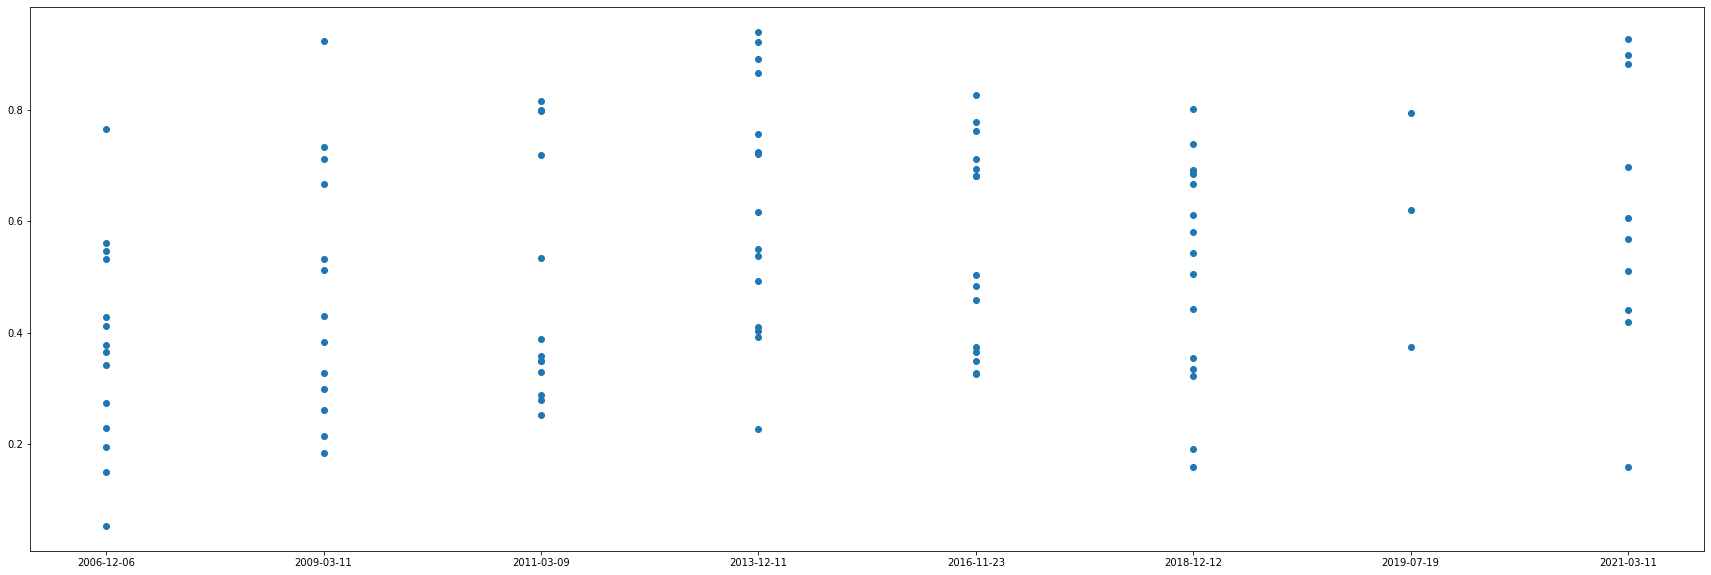

In [31]:
plt.figure(figsize =(30,10))
plt.scatter(date, valence)

2019年7月君の名はのリリース年でvalenceの低い曲が少なく見えるが、
そもそこの時期の曲は3つしか取り入れなかった。
このことが影響している

# このspotify分析でやりたいこと
- 数値として季節ごとのエネルギー度を求める
- リリース日とアルバム名を組み合わせて横軸をアルバム名にしたい
- 君の名はで有名になってからの曲調の変化、長さの確認
- 年齢が上がるにつれて激しい曲はどう増減したか
- どんな曲が人気なのか(エネルギー、曲調？)